In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving nexgen_workshop.csv to nexgen_workshop.csv


In [3]:
df = pd.read_csv('nexgen_workshop.csv')

In [4]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,source
0,5.1,3.5,1.4,0.2,setosa,manual
1,4.9,3.0,1.4,0.2,setosa,auto
2,4.7,3.2,1.3,0.2,setosa,manual
3,4.6,3.1,NaN,0.2,setosa,auto
4,5.0,3.6,1.4,0.2,setosa,auto
...,...,...,...,...,...,...
149,5.9,3.0,5.1,1.8,virginica,manual
150,4.6,3.2,1.4,0.2,setosa,???
151,4.6,3.1,NaN,0.2,setosa,???
152,5.4,3.4,1.5,0.4,setosa,manual


In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,source
0,5.1,3.5,1.4,0.2,setosa,manual
1,4.9,3.0,1.4,0.2,setosa,auto
2,4.7,3.2,1.3,0.2,setosa,manual
3,4.6,3.1,NaN,0.2,setosa,auto
4,5.0,3.6,1.4,0.2,setosa,auto


In [6]:
df.shape

(154, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  154 non-null    float64
 1   sepal width (cm)   146 non-null    float64
 2   petal length (cm)  144 non-null    float64
 3   petal width (cm)   154 non-null    float64
 4   species            154 non-null    object 
 5   source             154 non-null    object 
dtypes: float64(4), object(2)
memory usage: 7.3+ KB


In [8]:
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),8
petal length (cm),10
petal width (cm),0
species,0
source,0


In [9]:
df.isnull().sum()/df.shape[0]*100

,0
sepal length (cm),0.000000
sepal width (cm),5.194805
petal length (cm),6.493506
petal width (cm),0.000000
species,0.000000
source,0.000000


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
for i in df.select_dtypes(include='object').columns:
   print(df[i].value_counts())
   print('---'*10)

species
setosa        51
versicolor    50
virginica     48
0              5
Name: count, dtype: int64
------------------------------
source
manual    57
???       53
auto      44
Name: count, dtype: int64
------------------------------


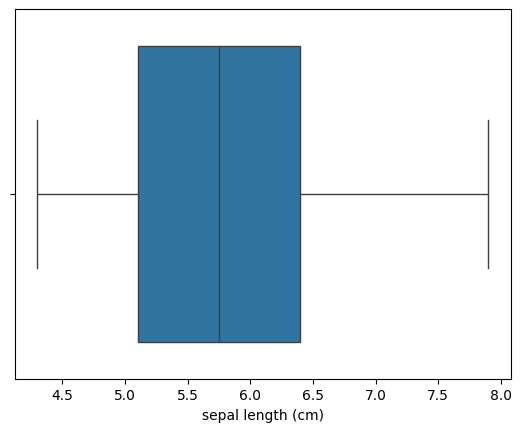

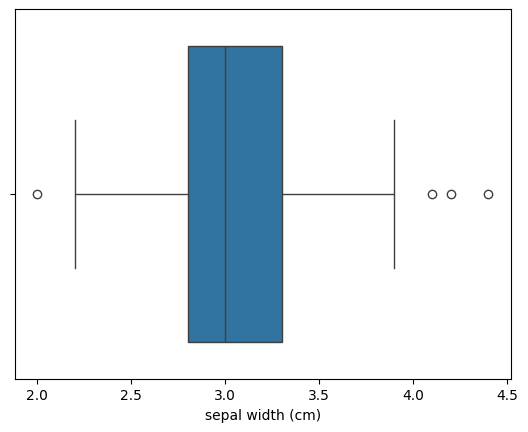

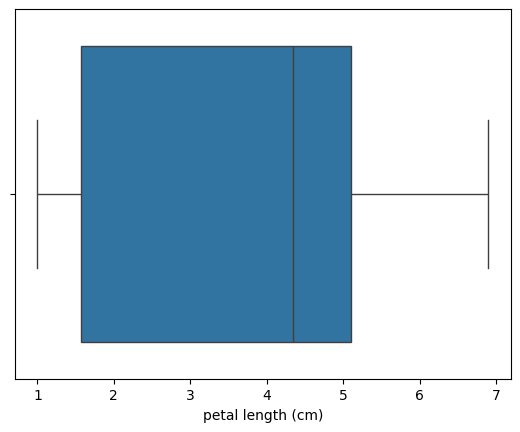

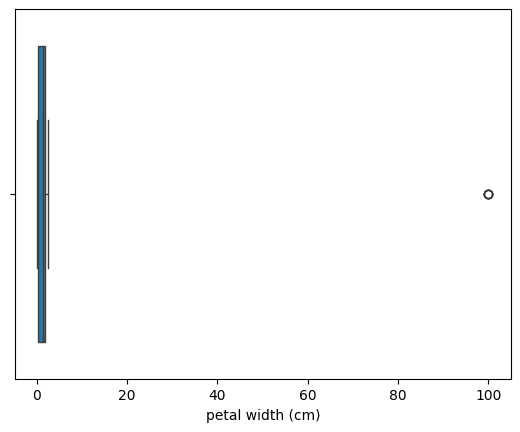

In [12]:
for i in df.select_dtypes(include='number').columns:
  sns.boxplot(x=df[i])
  plt.show()

In [13]:
df[df['sepal width (cm)'].isnull()].index

Index([14, 16, 44, 56, 75, 98, 131, 141], dtype='int64')

In [14]:
df['sepal width (cm)'].iloc[14:17]

,sepal width (cm)
14,NaN
15,4.4
16,NaN


In [15]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df[['sepal width (cm)']] = imputer.fit_transform(df[['sepal width (cm)']])

In [16]:
df['sepal width (cm)'].iloc[14:17]

,sepal width (cm)
14,3.040411
15,4.400000
16,3.040411


In [17]:
df[df['petal length (cm)'].isnull()].index

Index([3, 6, 12, 24, 25, 108, 113, 129, 151, 153], dtype='int64')

In [18]:
df['petal length (cm)'].iloc[3:7]

,petal length (cm)
3,NaN
4,1.4
5,1.7
6,NaN


In [19]:
df[['petal length (cm)']] = imputer.fit_transform(df[['petal length (cm)']])

In [20]:
df['petal length (cm)'].iloc[3:7]

,petal length (cm)
3,3.765278
4,1.400000
5,1.700000
6,3.765278


In [21]:
mean_petal = int(df[df["petal width (cm)"] > 0]["petal width (cm)"].mean())  # Replacing the age 0 by mean age
df.loc[df["petal width (cm)"] > 10, "petal width (cm)"] = mean_petal

In [22]:
print(mean_petal)

4


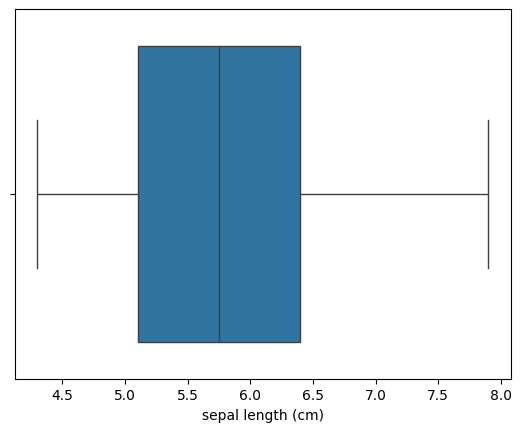

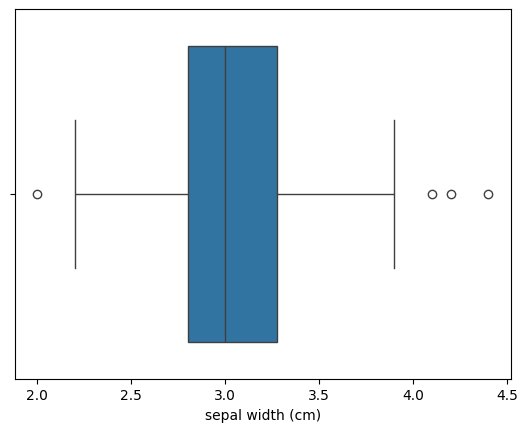

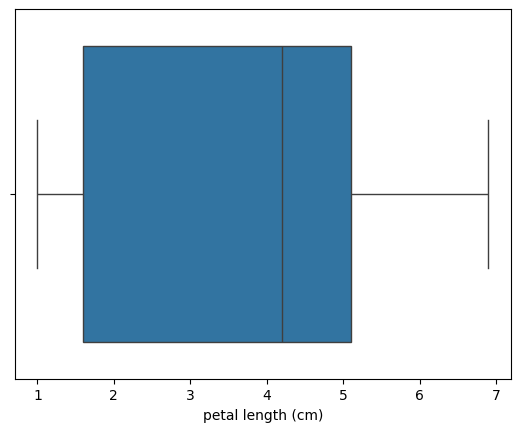

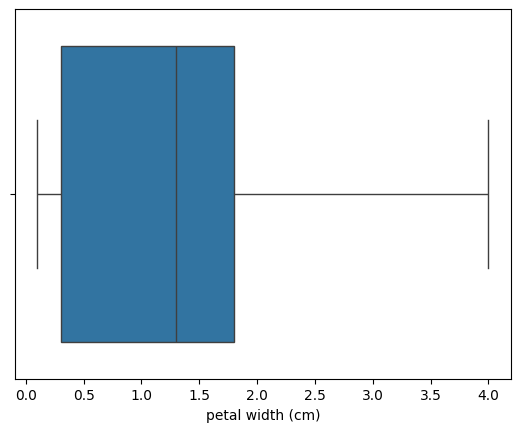

In [23]:
for i in df.select_dtypes(include='number').columns:
  sns.boxplot(x=df[i])
  plt.show()

In [24]:
df["source"] = df["source"].replace('???', df["source"].mode()[0])

In [25]:
df["source"]

,source
0,manual
1,auto
2,manual
3,auto
4,auto
...,...
149,manual
150,manual
151,manual
152,manual
